#Import

In [205]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

In [207]:
train_org = pd.read_csv('/content/drive/MyDrive/ML-Drivendata/train.csv', index_col='id')
label_org = pd.read_csv('/content/drive/MyDrive/ML-Drivendata/label.csv', index_col='id')
test_org=pd.read_csv('/content/drive/MyDrive/ML-Drivendata/test.csv', index_col='id')
submission_org=pd.read_csv('/content/drive/MyDrive/ML-Drivendata/SubmissionFormat.csv')

In [208]:
train = pd.read_csv('/content/drive/MyDrive/ML-Drivendata/train.csv', index_col='id')
label = pd.read_csv('/content/drive/MyDrive/ML-Drivendata/label.csv', index_col='id')
test=pd.read_csv('/content/drive/MyDrive/ML-Drivendata/test.csv', index_col='id')
submission=pd.read_csv('/content/drive/MyDrive/ML-Drivendata/SubmissionFormat.csv')

In [209]:
# train.dtypes

In [210]:
train.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [211]:
# test.head()


In [212]:
# label.head()

In [213]:
# train=train.join(label)

In [214]:
# train.head()

In [215]:
train.describe()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [216]:
test.describe()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,14850.000000,14850.000000,14850.000000,1.485000e+04,14850.000000,14850.000000,14850.000000,14850.000000,14850.000000
mean,322.826983,655.147609,34.061605,-5.684724e+00,0.415084,15.139057,5.626397,184.114209,1289.708350
std,2510.968644,691.261185,6.593034,2.940803e+00,8.167910,17.191329,9.673842,469.499332,955.241087
min,0.000000,-57.000000,0.000000,-1.156459e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.069455,-8.443970e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,0.000000,344.000000,34.901215,-5.049750e+00,0.000000,12.000000,3.000000,20.000000,1986.000000
75%,25.000000,1308.000000,37.196594,-3.320594e+00,0.000000,17.000000,5.000000,220.000000,2004.000000
max,200000.000000,2777.000000,40.325016,-2.000000e-08,669.000000,99.000000,80.000000,11469.000000,2013.000000


In [217]:
label.describe()

,status_group
count,59400
unique,3
top,functional
freq,32259


In [218]:
train.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [219]:
train.columns

Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'wpt_name', 'num_private', 'basin',
       'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward',
       'population', 'public_meeting', 'recorded_by', 'scheme_management',
       'scheme_name', 'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

#Missing values

In [220]:

train=train_org.copy()
test=test_org.copy()

In [221]:
train.permit = train.permit.fillna(True)
test.permit = test.permit.fillna(True)

In [222]:
cols_with_missing = [col for col in test.columns
                     if test[col].isnull().any()]
cols_with_missing

['funder',
 'installer',
 'subvillage',
 'public_meeting',
 'scheme_management',
 'scheme_name']

In [223]:
cols_with_missing_train = [col for col in train.columns
                     if train[col].isnull().any()]
cols_with_missing_train

['funder',
 'installer',
 'subvillage',
 'public_meeting',
 'scheme_management',
 'scheme_name']

In [224]:
train = train.drop(columns = cols_with_missing)
test = test.drop(columns = cols_with_missing)

In [225]:
print(len(train_org.columns))
print(len(train.columns))
print(len(test.columns))


39
33
33


In [226]:
train.columns

Index(['amount_tsh', 'date_recorded', 'gps_height', 'longitude', 'latitude',
       'wpt_name', 'num_private', 'basin', 'region', 'region_code',
       'district_code', 'lga', 'ward', 'population', 'recorded_by', 'permit',
       'construction_year', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

#Feature Engineering

In [227]:
print(len(train.columns))

33


In [228]:
train["year_recorded"] = train["date_recorded"].astype(str).str[0:4].astype(int)
test["year_recorded"] = test["date_recorded"].astype(str).str[0:4].astype(int)

In [229]:
train=train.drop(columns=["date_recorded","year_recorded"])
test=test.drop(columns=["date_recorded","year_recorded"])

In [230]:
# train["year_recorded"].head()

In [231]:
train.head()

,amount_tsh,gps_height,longitude,latitude,wpt_name,num_private,basin,region,region_code,district_code,lga,ward,population,recorded_by,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,1390,34.938093,-9.856322,none,0,Lake Nyasa,Iringa,11,5,Ludewa,Mundindi,109,GeoData Consultants Ltd,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0.0,1399,34.698766,-2.147466,Zahanati,0,Lake Victoria,Mara,20,2,Serengeti,Natta,280,GeoData Consultants Ltd,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25.0,686,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Manyara,21,4,Simanjiro,Ngorika,250,GeoData Consultants Ltd,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0.0,263,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mtwara,90,63,Nanyumbu,Nanyumbu,58,GeoData Consultants Ltd,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,0.0,0,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kagera,18,1,Karagwe,Nyakasimbi,0,GeoData Consultants Ltd,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [232]:
test.head()

,amount_tsh,gps_height,longitude,latitude,wpt_name,num_private,basin,region,region_code,district_code,lga,ward,population,recorded_by,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
50785,0.0,1996,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Manyara,21,3,Mbulu,Bashay,321,GeoData Consultants Ltd,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
51630,0.0,1569,36.656709,-3.309214,Kimnyak,0,Pangani,Arusha,2,2,Arusha Rural,Kimnyaki,300,GeoData Consultants Ltd,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
17168,0.0,1567,34.767863,-5.004344,Puma Secondary,0,Internal,Singida,13,2,Singida Rural,Puma,500,GeoData Consultants Ltd,True,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
45559,0.0,267,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Lindi,80,43,Liwale,Mkutano,250,GeoData Consultants Ltd,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
49871,500.0,1260,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Ruvuma,10,3,Mbinga,Mbinga Urban,60,GeoData Consultants Ltd,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


#Encode_support

In [233]:
# object_cols=['date_recorded', 'installer','wpt_name',  'basin','subvillage', 'region', 'region_code', 'lga', 'ward',  'recorded_by', 'scheme_management',    'scheme_name', 'permit','public_meeting',  'extraction_type',  'extraction_type_group', 'extraction_type_class', 'management',       'management_group', 'payment', 'payment_type', 'water_quality','quality_group', 'quantity', 'quantity_group', 'source', 'source_type',       'source_class', 'waterpoint_type', 'waterpoint_type_group']
# len(object_cols)

In [234]:
train.describe()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [235]:
# test.head()

In [236]:
train.head()

,amount_tsh,gps_height,longitude,latitude,wpt_name,num_private,basin,region,region_code,district_code,lga,ward,population,recorded_by,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,1390,34.938093,-9.856322,none,0,Lake Nyasa,Iringa,11,5,Ludewa,Mundindi,109,GeoData Consultants Ltd,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0.0,1399,34.698766,-2.147466,Zahanati,0,Lake Victoria,Mara,20,2,Serengeti,Natta,280,GeoData Consultants Ltd,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25.0,686,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Manyara,21,4,Simanjiro,Ngorika,250,GeoData Consultants Ltd,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0.0,263,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mtwara,90,63,Nanyumbu,Nanyumbu,58,GeoData Consultants Ltd,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,0.0,0,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kagera,18,1,Karagwe,Nyakasimbi,0,GeoData Consultants Ltd,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [237]:
test.head()

,amount_tsh,gps_height,longitude,latitude,wpt_name,num_private,basin,region,region_code,district_code,lga,ward,population,recorded_by,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
50785,0.0,1996,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Manyara,21,3,Mbulu,Bashay,321,GeoData Consultants Ltd,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
51630,0.0,1569,36.656709,-3.309214,Kimnyak,0,Pangani,Arusha,2,2,Arusha Rural,Kimnyaki,300,GeoData Consultants Ltd,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
17168,0.0,1567,34.767863,-5.004344,Puma Secondary,0,Internal,Singida,13,2,Singida Rural,Puma,500,GeoData Consultants Ltd,True,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
45559,0.0,267,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Lindi,80,43,Liwale,Mkutano,250,GeoData Consultants Ltd,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
49871,500.0,1260,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Ruvuma,10,3,Mbinga,Mbinga Urban,60,GeoData Consultants Ltd,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [238]:
columns=train.columns

In [239]:
columns_numbers=train.describe().columns

In [240]:
columns_numbers_drop=list(set(columns)-set(columns_numbers))

#Resources : Columns to be *Encoded*

In [241]:
# columns_good=['recorded_by',
#  'extraction_type_class',
#  'quantity_group',
#  'source_type',
#  'management',
#  'region',
#  'payment',
#  'management_group',
#  'quantity',]

columns_good=['quantity',
 'water_quality',
 'recorded_by',
 'extraction_type_class',
 'basin',
 'payment',
 'quantity_group',
 'extraction_type',
 'extraction_type_group',
 'source_type','permit']

In [242]:
columns_bad=["ward",'wpt_name']

In [243]:
columns_try=list(set(columns_numbers_drop)-set(columns_bad))

#Encode

In [244]:
ordinal_encoder = OrdinalEncoder()
lis_name=[]
for col in columns_try:
  print(col)
  lis_name.append(col)
  train[[col]] = ordinal_encoder.fit_transform(train[[col]])
  test[[col]] = ordinal_encoder.transform(test[[col]])
# train[object_cols] = ordinal_encoder.fit_transform(train[object_cols])
# test[object_cols] = ordinal_encoder.transform(test[object_cols])

management
payment_type
extraction_type_group
water_quality
waterpoint_type_group
basin
extraction_type_class
permit
source_class
source_type
region
extraction_type
payment
management_group
recorded_by
source
quantity_group
quantity
waterpoint_type
lga
quality_group


In [245]:
lis_name

['management',
 'payment_type',
 'extraction_type_group',
 'water_quality',
 'waterpoint_type_group',
 'basin',
 'extraction_type_class',
 'permit',
 'source_class',
 'source_type',
 'region',
 'extraction_type',
 'payment',
 'management_group',
 'recorded_by',
 'source',
 'quantity_group',
 'quantity',
 'waterpoint_type',
 'lga',
 'quality_group']

In [246]:
train=train.drop(columns=["ward",'wpt_name'])
test=test.drop(columns=["ward",'wpt_name'])

In [247]:
(train.columns)

Index(['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private',
       'basin', 'region', 'region_code', 'district_code', 'lga', 'population',
       'recorded_by', 'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

In [248]:
test.head()


,amount_tsh,gps_height,longitude,latitude,num_private,basin,region,region_code,district_code,lga,population,recorded_by,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
50785,0.0,1996,35.290799,-4.059696,0,0.0,8.0,21,3,63.0,321,0.0,1.0,2012,9.0,6.0,3.0,3.0,2.0,0.0,2.0,6.0,2.0,3.0,3.0,5.0,3.0,1.0,6.0,5.0
51630,0.0,1569,36.656709,-3.309214,0,5.0,0.0,2,2,0.0,300,0.0,1.0,2000,3.0,1.0,0.0,7.0,4.0,0.0,2.0,6.0,2.0,2.0,2.0,8.0,6.0,0.0,1.0,1.0
17168,0.0,1567,34.767863,-5.004344,0,0.0,18.0,13,2,109.0,500,0.0,1.0,2010,9.0,6.0,3.0,7.0,4.0,0.0,2.0,6.0,2.0,2.0,2.0,5.0,3.0,1.0,6.0,5.0
45559,0.0,267,38.058046,-9.418672,0,7.0,7.0,80,43,49.0,250,0.0,1.0,1987,9.0,6.0,3.0,7.0,4.0,6.0,6.0,6.0,2.0,0.0,0.0,7.0,5.0,0.0,6.0,5.0
49871,500.0,1260,35.006123,-10.950412,0,7.0,16.0,10,3,61.0,60,0.0,1.0,2000,3.0,1.0,0.0,9.0,4.0,3.0,1.0,6.0,2.0,1.0,1.0,8.0,6.0,0.0,1.0,1.0


In [249]:
train.head()

,amount_tsh,gps_height,longitude,latitude,num_private,basin,region,region_code,district_code,lga,population,recorded_by,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,1390,34.938093,-9.856322,0,1.0,3.0,11,5,51.0,109,0.0,0.0,1999,3.0,1.0,0.0,7.0,4.0,2.0,0.0,6.0,2.0,1.0,1.0,8.0,6.0,0.0,1.0,1.0
8776,0.0,1399,34.698766,-2.147466,0,4.0,9.0,20,2,103.0,280,0.0,1.0,2010,3.0,1.0,0.0,11.0,4.0,0.0,2.0,6.0,2.0,2.0,2.0,5.0,3.0,1.0,1.0,1.0
34310,25.0,686,37.460664,-3.821329,0,5.0,8.0,21,4,108.0,250,0.0,1.0,2009,3.0,1.0,0.0,7.0,4.0,4.0,5.0,6.0,2.0,1.0,1.0,0.0,1.0,1.0,2.0,1.0
67743,0.0,263,38.486161,-11.155298,0,7.0,12.0,90,63,87.0,58,0.0,1.0,1986,14.0,10.0,5.0,7.0,4.0,0.0,2.0,6.0,2.0,0.0,0.0,3.0,0.0,0.0,2.0,1.0
19728,0.0,0,31.130847,-1.825359,0,4.0,4.0,18,1,26.0,0,0.0,1.0,0,3.0,1.0,0.0,1.0,1.0,0.0,2.0,6.0,2.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0


In [250]:
test.columns==train.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [251]:
len(train.columns)

30

In [252]:
train_encode_org=train
test_encode_org=test

#Correlation

In [253]:
train.head()

,amount_tsh,gps_height,longitude,latitude,num_private,basin,region,region_code,district_code,lga,population,recorded_by,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,1390,34.938093,-9.856322,0,1.0,3.0,11,5,51.0,109,0.0,0.0,1999,3.0,1.0,0.0,7.0,4.0,2.0,0.0,6.0,2.0,1.0,1.0,8.0,6.0,0.0,1.0,1.0
8776,0.0,1399,34.698766,-2.147466,0,4.0,9.0,20,2,103.0,280,0.0,1.0,2010,3.0,1.0,0.0,11.0,4.0,0.0,2.0,6.0,2.0,2.0,2.0,5.0,3.0,1.0,1.0,1.0
34310,25.0,686,37.460664,-3.821329,0,5.0,8.0,21,4,108.0,250,0.0,1.0,2009,3.0,1.0,0.0,7.0,4.0,4.0,5.0,6.0,2.0,1.0,1.0,0.0,1.0,1.0,2.0,1.0
67743,0.0,263,38.486161,-11.155298,0,7.0,12.0,90,63,87.0,58,0.0,1.0,1986,14.0,10.0,5.0,7.0,4.0,0.0,2.0,6.0,2.0,0.0,0.0,3.0,0.0,0.0,2.0,1.0
19728,0.0,0,31.130847,-1.825359,0,4.0,4.0,18,1,26.0,0,0.0,1.0,0,3.0,1.0,0.0,1.0,1.0,0.0,2.0,6.0,2.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0


In [254]:
train.corr()

,amount_tsh,gps_height,longitude,latitude,num_private,basin,region,region_code,district_code,lga,population,recorded_by,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
amount_tsh,1.000000,0.076650,0.022134,-0.052670,0.002944,0.013977,-0.019866,-0.026813,-0.023599,0.010315,0.016288,NaN,0.023026,0.067915,-0.025091,-0.017738,-0.013213,-0.008835,-0.001836,0.013623,-0.118563,0.012624,-0.023995,-0.014526,-0.014526,0.001201,-0.000711,0.034922,-0.043821,-0.042143
gps_height,0.076650,1.000000,0.149155,-0.035751,0.007237,-0.161768,-0.323833,-0.183521,-0.171233,0.137375,0.135003,NaN,0.091959,0.658727,-0.237886,-0.261342,-0.232483,-0.037572,0.025610,0.114219,-0.097431,0.140459,-0.092273,-0.030781,-0.030781,0.121495,0.124323,0.041968,-0.236758,-0.215989
longitude,0.022134,0.149155,1.000000,-0.425802,0.023873,0.216088,-0.142783,0.034197,0.151398,0.227492,0.086590,NaN,0.103182,0.396732,-0.027119,-0.018322,0.049411,-0.176484,-0.080633,0.015608,-0.007441,-0.051622,-0.031906,0.015785,0.015785,-0.013228,-0.047479,0.020594,-0.163355,-0.144605
latitude,-0.052670,-0.035751,-0.425802,1.000000,0.006837,-0.218502,-0.025485,-0.221018,-0.201020,-0.268503,-0.022152,NaN,0.070615,-0.245278,-0.005193,-0.000162,0.001696,0.048213,-0.056396,-0.041983,0.145438,-0.010955,0.038672,0.117193,0.117193,0.024544,0.064626,-0.040928,0.160127,0.146218
num_private,0.002944,0.007237,0.023873,0.006837,1.000000,0.018325,0.037351,-0.020377,-0.004478,-0.000843,0.003818,NaN,0.008602,0.026056,0.017254,0.014590,0.024027,-0.008308,-0.034356,-0.000894,0.008963,-0.001533,-0.006318,0.003544,0.003544,-0.007913,-0.010613,0.008769,-0.021993,-0.019882
basin,0.013977,-0.161768,0.216088,-0.218502,0.018325,1.000000,-0.114880,0.139887,0.189692,-0.006718,0.066899,NaN,0.016919,0.268151,0.167450,0.189307,0.177939,-0.061139,-0.068413,-0.017788,-0.029961,-0.075529,0.044721,-0.026707,-0.026707,-0.061457,-0.074808,0.031636,0.009864,0.013518
region,-0.019866,-0.323833,-0.142783,-0.025485,0.037351,-0.114880,1.000000,0.109343,-0.021688,0.193919,-0.004416,NaN,-0.035763,-0.141681,0.217222,0.233877,0.210724,0.076552,-0.023112,-0.054115,0.056709,-0.073382,0.129883,0.034766,0.034766,-0.156225,-0.140439,-0.010899,0.279421,0.257183
region_code,-0.026813,-0.183521,0.034197,-0.221018,-0.020377,0.139887,0.109343,1.000000,0.678602,0.042477,0.094088,NaN,-0.036440,0.031724,0.101472,0.097687,0.149480,-0.011492,0.033028,0.032908,0.140829,-0.063508,0.084583,-0.066812,-0.066812,-0.129150,-0.141470,-0.076227,0.184622,0.160814
district_code,-0.023599,-0.171233,0.151398,-0.201020,-0.004478,0.189692,-0.021688,0.678602,1.000000,0.110921,0.061831,NaN,-0.081400,0.048315,0.026746,0.018557,0.067143,-0.038697,0.015617,-0.003872,0.093541,-0.061223,0.037939,-0.027803,-0.027803,-0.051498,-0.068146,-0.047691,0.081200,0.077531
lga,0.010315,0.137375,0.227492,-0.268503,-0.000843,-0.006718,0.193919,0.042477,0.110921,1.000000,-0.004088,NaN,0.027422,0.133283,0.024245,-0.007504,-0.002427,-0.082065,-0.012648,-0.110791,-0.182848,0.016568,0.030434,0.014416,0.014416,-0.065904,-0.061295,-0.021990,0.030154,0.033760


In [255]:
test.corr()

,amount_tsh,gps_height,longitude,latitude,num_private,basin,region,region_code,district_code,lga,population,recorded_by,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
amount_tsh,1.000000,0.096230,0.027709,-0.072210,0.022978,0.010499,-0.025192,-0.028887,-0.027391,0.017512,0.028657,NaN,0.027985,0.086236,-0.012684,-0.004503,0.002973,-0.014752,-0.002762,0.016536,-0.149500,0.016066,-0.024078,-0.021378,-0.021378,-0.009184,-0.013590,0.045139,-0.056783,-0.052004
gps_height,0.096230,1.000000,0.148722,-0.045028,0.013331,-0.147223,-0.328637,-0.177832,-0.169586,0.141058,0.131994,NaN,0.096544,0.656781,-0.240104,-0.264129,-0.242939,-0.034443,0.028842,0.106481,-0.109161,0.119284,-0.080745,-0.034325,-0.034325,0.123950,0.127226,0.034692,-0.236620,-0.215996
longitude,0.027709,0.148722,1.000000,-0.430001,0.030979,0.223014,-0.141668,0.024354,0.148962,0.223090,0.090862,NaN,0.110420,0.397361,-0.021254,-0.009044,0.049896,-0.175830,-0.083628,0.022463,-0.006047,-0.064723,-0.031846,0.013137,0.013137,-0.016433,-0.046007,0.026341,-0.171623,-0.155396
latitude,-0.072210,-0.045028,-0.430001,1.000000,0.002048,-0.221105,-0.018482,-0.203080,-0.196176,-0.262367,-0.024123,NaN,0.058497,-0.256610,-0.003080,-0.001531,0.005551,0.060897,-0.044055,-0.041241,0.153829,-0.002757,0.042635,0.119236,0.119236,0.035154,0.076157,-0.041111,0.156547,0.142831
num_private,0.022978,0.013331,0.030979,0.002048,1.000000,0.028479,0.051803,-0.028188,-0.010341,-0.018163,0.001517,NaN,0.022312,0.036118,0.012036,0.008143,0.022617,-0.016584,-0.026328,-0.001930,-0.000094,0.009855,-0.012349,0.008477,0.008477,0.005385,0.003171,0.022156,-0.035530,-0.034355
basin,0.010499,-0.147223,0.223014,-0.221105,0.028479,1.000000,-0.114519,0.124467,0.185613,-0.007857,0.090163,NaN,0.020711,0.285037,0.173774,0.200076,0.186360,-0.075952,-0.081263,-0.016719,-0.028867,-0.070822,0.054366,-0.029903,-0.029903,-0.059481,-0.077992,0.032601,0.004786,0.009984
region,-0.025192,-0.328637,-0.141668,-0.018482,0.051803,-0.114519,1.000000,0.109600,-0.019412,0.180985,0.002108,NaN,-0.031549,-0.144003,0.202150,0.222520,0.204395,0.070313,-0.027766,-0.055554,0.055213,-0.065517,0.126152,0.044962,0.044962,-0.138650,-0.122962,-0.002032,0.285223,0.265302
region_code,-0.028887,-0.177832,0.024354,-0.203080,-0.028188,0.124467,0.109600,1.000000,0.687910,0.037628,0.097118,NaN,-0.026829,0.029993,0.085504,0.084975,0.136572,-0.012362,0.029382,0.016668,0.124765,-0.079856,0.089218,-0.082586,-0.082586,-0.123816,-0.138402,-0.078564,0.206689,0.187086
district_code,-0.027391,-0.169586,0.148962,-0.196176,-0.010341,0.185613,-0.019412,0.687910,1.000000,0.113492,0.066425,NaN,-0.077512,0.046214,0.017329,0.010547,0.062718,-0.041746,0.009289,-0.008303,0.087947,-0.078872,0.042567,-0.047852,-0.047852,-0.057699,-0.077456,-0.056221,0.108218,0.107355
lga,0.017512,0.141058,0.223090,-0.262367,-0.018163,-0.007857,0.180985,0.037628,0.113492,1.000000,-0.009628,NaN,0.033597,0.130650,0.018438,-0.013088,-0.013734,-0.086160,-0.005481,-0.119651,-0.199039,0.019868,0.030158,0.025109,0.025109,-0.058041,-0.057486,-0.026149,0.024364,0.028179


In [256]:
columns_train=train.columns
columns_test=test.columns

In [257]:
columns_train

Index(['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private',
       'basin', 'region', 'region_code', 'district_code', 'lga', 'population',
       'recorded_by', 'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

In [258]:
columns_corr_remove=["recorded_by","region_code","extraction_type","extraction_type_class","management","payment_type","quantity","source_type","waterpoint_type"]

In [259]:
train=train.drop(columns=columns_corr_remove)

In [260]:
test=test.drop(columns=columns_corr_remove)

In [261]:
train.head()

,amount_tsh,gps_height,longitude,latitude,num_private,basin,region,district_code,lga,population,permit,construction_year,extraction_type_group,management_group,payment,water_quality,quality_group,quantity_group,source,source_class,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,1390,34.938093,-9.856322,0,1.0,3.0,5,51.0,109,0.0,1999,1.0,4.0,2.0,6.0,2.0,1.0,8.0,0.0,1.0
8776,0.0,1399,34.698766,-2.147466,0,4.0,9.0,2,103.0,280,1.0,2010,1.0,4.0,0.0,6.0,2.0,2.0,5.0,1.0,1.0
34310,25.0,686,37.460664,-3.821329,0,5.0,8.0,4,108.0,250,1.0,2009,1.0,4.0,4.0,6.0,2.0,1.0,0.0,1.0,1.0
67743,0.0,263,38.486161,-11.155298,0,7.0,12.0,63,87.0,58,1.0,1986,10.0,4.0,0.0,6.0,2.0,0.0,3.0,0.0,1.0
19728,0.0,0,31.130847,-1.825359,0,4.0,4.0,1,26.0,0,1.0,0,1.0,1.0,0.0,6.0,2.0,3.0,5.0,1.0,1.0


In [262]:
train.describe()

,amount_tsh,gps_height,longitude,latitude,num_private,basin,region,district_code,lga,population,permit,construction_year,extraction_type_group,management_group,payment,water_quality,quality_group,quantity_group,source,source_class,waterpoint_type_group
count,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,4.077172,9.835606,5.629747,60.039882,179.909983,0.705522,1300.652475,3.936549,3.638418,2.318013,5.754293,2.263047,1.325758,6.063199,0.233737,2.056212
std,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,2.473082,5.936892,9.633649,35.244499,471.482176,0.455812,951.620547,3.527073,1.058579,2.271259,0.900820,0.784268,0.803750,2.034190,0.434129,1.378937
min,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,2.000000,4.000000,2.000000,30.000000,0.000000,0.000000,0.000000,1.000000,4.000000,0.000000,6.000000,2.000000,1.000000,5.000000,0.000000,1.000000
50%,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,4.000000,10.000000,3.000000,60.000000,25.000000,1.000000,1986.000000,2.000000,4.000000,2.000000,6.000000,2.000000,1.000000,7.000000,0.000000,1.000000
75%,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,6.000000,15.000000,5.000000,91.000000,215.000000,1.000000,2004.000000,6.000000,4.000000,4.000000,6.000000,2.000000,2.000000,8.000000,0.000000,3.000000
max,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,8.000000,20.000000,80.000000,124.000000,30500.000000,1.000000,2013.000000,12.000000,4.000000,6.000000,7.000000,5.000000,4.000000,9.000000,2.000000,5.000000


In [263]:
train_org.describe()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [264]:
train_org.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [265]:
train.columns

Index(['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private',
       'basin', 'region', 'district_code', 'lga', 'population', 'permit',
       'construction_year', 'extraction_type_group', 'management_group',
       'payment', 'water_quality', 'quality_group', 'quantity_group', 'source',
       'source_class', 'waterpoint_type_group'],
      dtype='object')

#Checking Competition Description (drop quality_group)

In [266]:
train.head()

,amount_tsh,gps_height,longitude,latitude,num_private,basin,region,district_code,lga,population,permit,construction_year,extraction_type_group,management_group,payment,water_quality,quality_group,quantity_group,source,source_class,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,1390,34.938093,-9.856322,0,1.0,3.0,5,51.0,109,0.0,1999,1.0,4.0,2.0,6.0,2.0,1.0,8.0,0.0,1.0
8776,0.0,1399,34.698766,-2.147466,0,4.0,9.0,2,103.0,280,1.0,2010,1.0,4.0,0.0,6.0,2.0,2.0,5.0,1.0,1.0
34310,25.0,686,37.460664,-3.821329,0,5.0,8.0,4,108.0,250,1.0,2009,1.0,4.0,4.0,6.0,2.0,1.0,0.0,1.0,1.0
67743,0.0,263,38.486161,-11.155298,0,7.0,12.0,63,87.0,58,1.0,1986,10.0,4.0,0.0,6.0,2.0,0.0,3.0,0.0,1.0
19728,0.0,0,31.130847,-1.825359,0,4.0,4.0,1,26.0,0,1.0,0,1.0,1.0,0.0,6.0,2.0,3.0,5.0,1.0,1.0


In [267]:
train['water_quality'].describe()

count    59400.000000
mean         5.754293
std          0.900820
min          0.000000
25%          6.000000
50%          6.000000
75%          6.000000
max          7.000000
Name: water_quality, dtype: float64

In [268]:
train['quality_group'].describe()

count    59400.000000
mean         2.263047
std          0.784268
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          5.000000
Name: quality_group, dtype: float64

In [269]:
train_org.columns

Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'wpt_name', 'num_private', 'basin',
       'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward',
       'population', 'public_meeting', 'recorded_by', 'scheme_management',
       'scheme_name', 'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

In [270]:
# new_lis=train_org.drop(['subvillage','scheme_name','permit'])

In [271]:
train=train.drop(columns=['quality_group'])
test=test.drop(columns=['quality_group'])

#plot

In [272]:
plt.figure(figsize=(20,20))

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

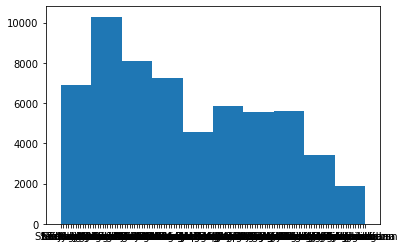

In [273]:
plt.hist(train_org['lga'])
plt.show()

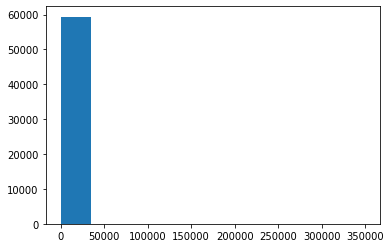

In [274]:
plt.hist(train_org['amount_tsh'])
plt.show()


In [275]:
# from sklearn.feature_selection import mutual_info_regression

# X=train_org.copy()
# y=label_org.copy()
# # X['status_group']=y['status_group']
# for colname in X.select_dtypes("object"):
#     X[colname], _ = X[colname].factorize()
# for colname in y.select_dtypes("object"):
#     y[colname], _ = y[colname].factorize()
# discrete_features = X.dtypes ==int
# def make_mi_scores(X, y, discrete_features):
#     mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
#     mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
#     mi_scores = mi_scores.sort_values(ascending=False)
#     return mi_scores

# mi_scores = make_mi_scores(X, y, discrete_features)
# mi_scores[::3] 

In [276]:
# train_org.head()

In [277]:
t=train.copy()

In [278]:
t['status_group']=label['status_group']

In [279]:
t.head()

,amount_tsh,gps_height,longitude,latitude,num_private,basin,region,district_code,lga,population,permit,construction_year,extraction_type_group,management_group,payment,water_quality,quantity_group,source,source_class,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,1390,34.938093,-9.856322,0,1.0,3.0,5,51.0,109,0.0,1999,1.0,4.0,2.0,6.0,1.0,8.0,0.0,1.0,functional
8776,0.0,1399,34.698766,-2.147466,0,4.0,9.0,2,103.0,280,1.0,2010,1.0,4.0,0.0,6.0,2.0,5.0,1.0,1.0,functional
34310,25.0,686,37.460664,-3.821329,0,5.0,8.0,4,108.0,250,1.0,2009,1.0,4.0,4.0,6.0,1.0,0.0,1.0,1.0,functional
67743,0.0,263,38.486161,-11.155298,0,7.0,12.0,63,87.0,58,1.0,1986,10.0,4.0,0.0,6.0,0.0,3.0,0.0,1.0,non functional
19728,0.0,0,31.130847,-1.825359,0,4.0,4.0,1,26.0,0,1.0,0,1.0,1.0,0.0,6.0,3.0,5.0,1.0,1.0,functional


In [280]:
t['status_group'] = t['status_group'].replace({'functional':int(1), 'non functional':int(0),'functional needs repair':2})

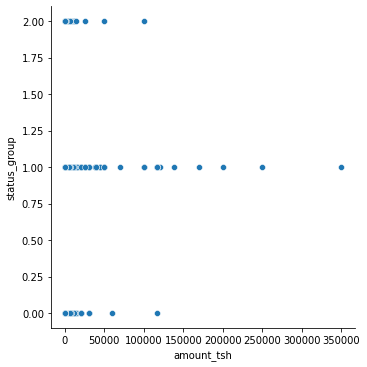

In [281]:
sns.relplot(x="amount_tsh", y="status_group", data=t);

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


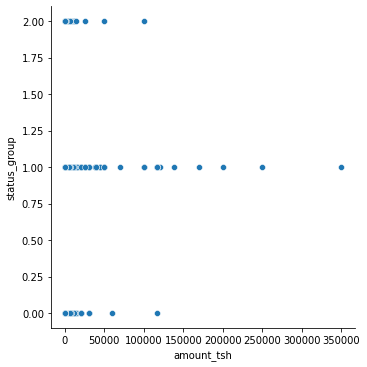

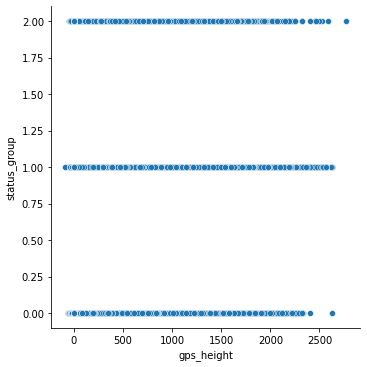

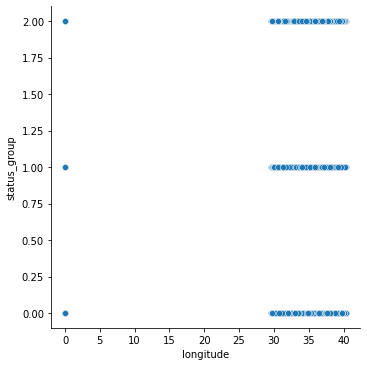

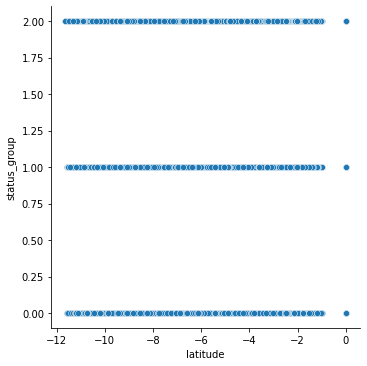

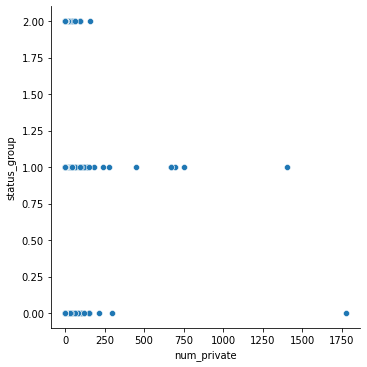

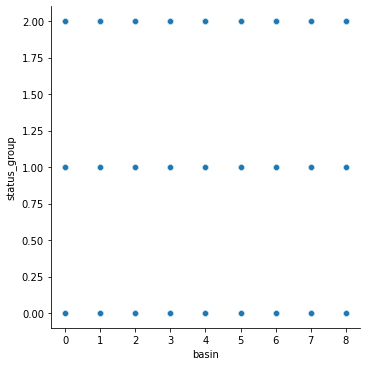

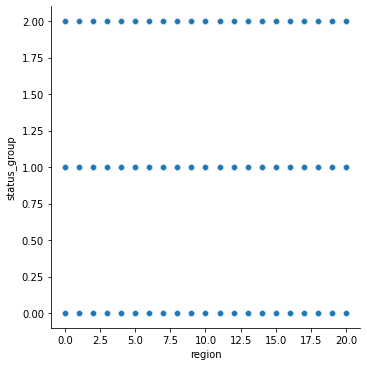

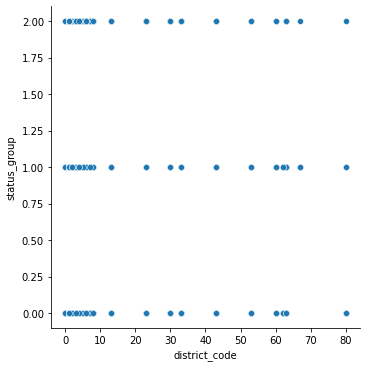

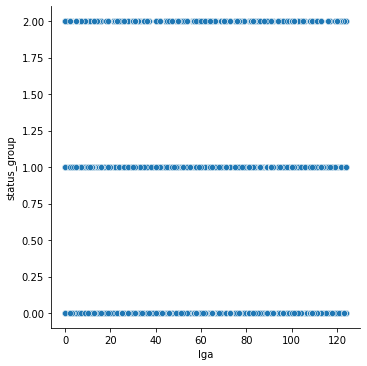

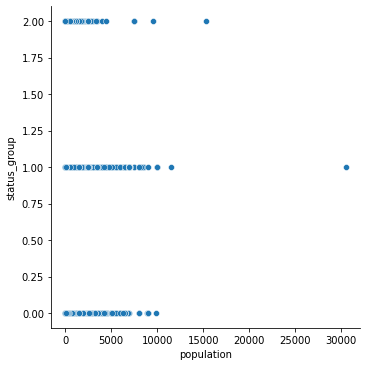

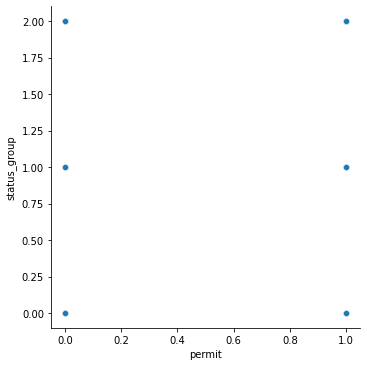

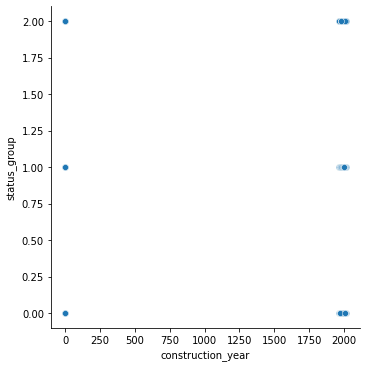

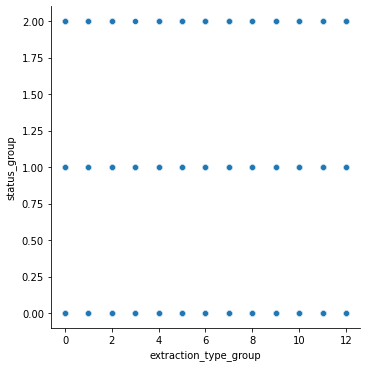

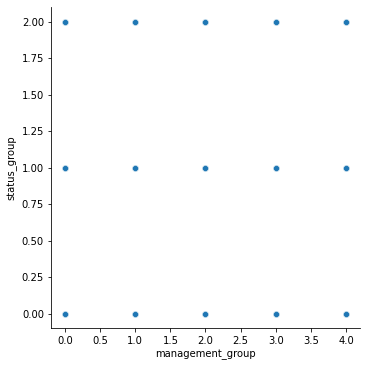

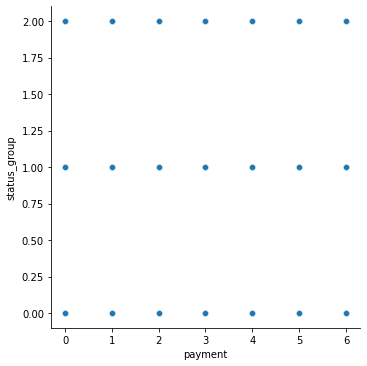

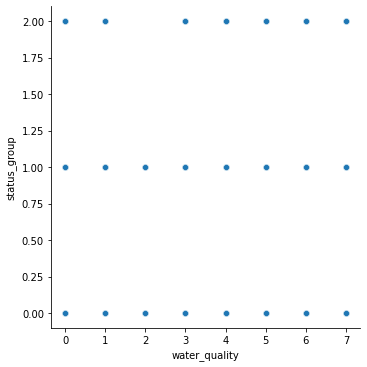

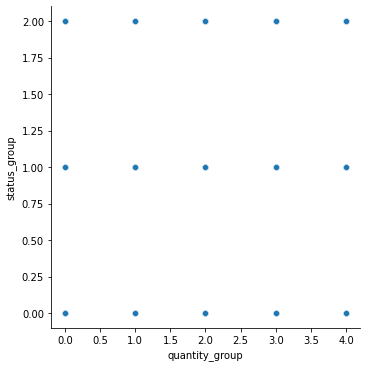

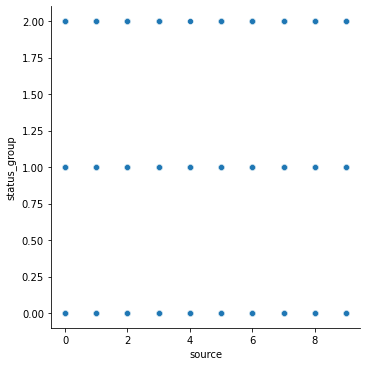

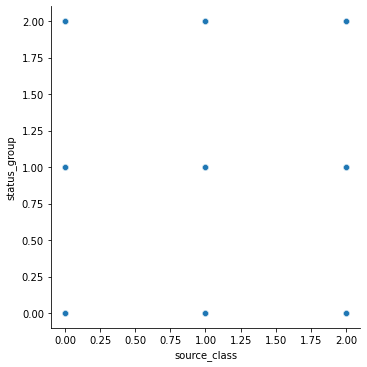

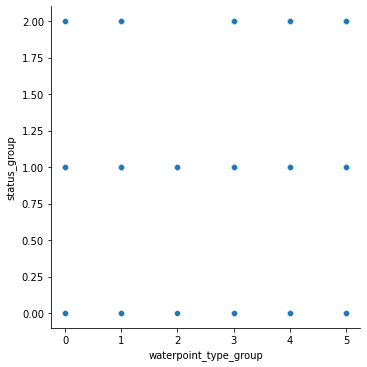

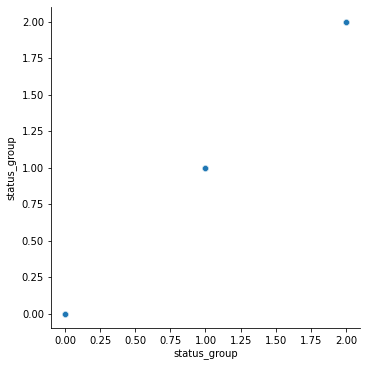

In [282]:
for col in t:
  sns.relplot(x=col, y="status_group", data=t);

In [283]:
t.longitude.value_counts()

0.000000     1812
37.540901       2
33.010510       2
39.093484       2
32.972719       2
             ... 
37.579803       1
33.196490       1
34.017119       1
33.788326       1
30.163579       1
Name: longitude, Length: 57516, dtype: int64

In [284]:
t.longitude.describe()

count    59400.000000
mean        34.077427
std          6.567432
min          0.000000
25%         33.090347
50%         34.908743
75%         37.178387
max         40.345193
Name: longitude, dtype: float64

In [285]:
# [t.longitude == 0].describe()

In [286]:
lon = t.loc[t.longitude==0]

In [287]:
lon.status_group.value_counts()

1    870
0    556
2    386
Name: status_group, dtype: int64

#Missing values (re-adding 'permit')

In [288]:
# .scheme_management.value_counts()

submission_new=pd.read_csv('/content/drive/MyDrive/ML-Drivendata/SubmissionFormat.csv')
submission_new.head()

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional


In [289]:
submission_new.status_group.value_counts()

functional                 9057
non functional             5254
functional needs repair     539
Name: status_group, dtype: int64

In [290]:
submission.status_group.value_counts()

functional                 9057
non functional             5254
functional needs repair     539
Name: status_group, dtype: int64

In [291]:
train_org.permit.value_counts()

True     38852
False    17492
Name: permit, dtype: int64

In [292]:
train_org["permit"].notnull().sum()

56344

In [293]:
train_org["quality_group"].notnull().sum()

59400

In [294]:
train_org.permit.describe()

count     56344
unique        2
top        True
freq      38852
Name: permit, dtype: object

In [295]:
test_org.permit.describe()

count     14113
unique        2
top        True
freq       9754
Name: permit, dtype: object

In [296]:
test_org.permit.value_counts()

True     9754
False    4359
Name: permit, dtype: int64

In [297]:
train_org.permit.notnull().sum()

56344

#Random Forest Algorithm

##hyperparameter tuning

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
# {'bootstrap': [True, False],
#  'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [200]:
'''
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(train, label)

'''

'\nrf = RandomForestClassifier()\n# Random search of parameters, using 3 fold cross validation, \n# search across 100 different combinations, and use all available cores\nrf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)\n# Fit the random search model\nrf_random.fit(train, label)\n\n'

##model train

In [ ]:
{'bootstrap': True,
 'class_weight'=None,
 'criterion': 'mse',
 'max_depth': 5,  
 'max_features': 'auto',
 'max_samples'=None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': 1, #slower
 'oob_score': False,
 'random_state': 1, 
 'verbose': 0,
 'warm_start': False}

In [ ]:
#@title
# model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model = RandomForestClassifier(bootstrap=True, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)
model.fit(train, label)
predictions = model.predict(test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
submission.head()

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional


#XG Boost

In [ ]:
X=train.copy()
Y=label.copy()
Z=test.copy()
Y['status_group'] = Y['status_group'].replace({'functional':int(1), 'non functional':int(0),'functional needs repair':2})

In [ ]:
Y.dtypes

status_group    int64
dtype: object

In [ ]:
# Y['status_group'].astype(float)

In [ ]:
print((Y))

       status_group
id                 
69572             1
8776              1
34310             1
67743             0
19728             1
...             ...
60739             1
27263             1
37057             1
31282             1
26348             1

[59400 rows x 1 columns]


In [ ]:
X.columns

Index(['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private',
       'basin', 'region', 'district_code', 'lga', 'population',
       'construction_year', 'extraction_type_group', 'management_group',
       'payment', 'water_quality', 'quality_group', 'quantity_group', 'source',
       'source_class', 'waterpoint_type_group'],
      dtype='object')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=10, shuffle=True)

In [ ]:
# from sklearn.model_selection import GridSearchCV

def xgmodel(X_train, X_val, y_train, y_val):
    if __name__ == '__main__':
    
        param_grid = {'learning_rate': [0.075, 0.25],
                      'max_depth': [13, 14],
                      'n_estimators': [100, 200]}                      

        estimator = GridSearchCV(estimator=XGBClassifier(),
                                 param_grid=param_grid,
                                 n_jobs=-1)

        estimator.fit(X_train, y_train)

        best_params = estimator.best_params_

        print (best_params)
                                 
        validation_accuracy = estimator.score(X_val, y_val)
        print('Validation accuracy: ', validation_accuracy)

In [ ]:
# xgmodel(X_train, X_test, y_train, y_test)

In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(max_depth=13,n_estimators=200,learning_rate=0.075)
xgb_model.fit(X,Y)
predictions = xgb_model.predict(Z)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Y['status_group'] = Y['status_group'].replace({'functional':int(1), 'non functional':int(0),'functional needs repair':2})
output_XG = pd.DataFrame({'id': submission.id, 'status_group': predictions})
# output.to_csv('/content/drive/MyDrive/ML-Drivendata/SubmissionFormat.csv', index=False)
# print("Your submission was successfully saved!")

In [ ]:
output_XG['status_group'] = output_XG['status_group'].replace({1:'functional', 0:'non functional',2:'functional needs repair'})

In [ ]:
output_XG.to_csv('/content/drive/MyDrive/ML-Drivendata/SubmissionFormat.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


#Gradient Boosting Algorithm 

In [ ]:
X=train.copy()
Y=label.copy()
Z=test.copy()
Y['status_group'] = Y['status_group'].replace({'functional':int(1), 'non functional':int(0),'functional needs repair':2})

In [ ]:
X_trainG, X_testG, y_trainG, y_testG = train_test_split(X, Y, test_size=0.1, random_state=10, shuffle=True)

In [ ]:
# from sklearn.model_selection import GridSearchCV
def model(X_train, X_val, y_train, y_val):
    if __name__ == '__main__':
    
        param_grid = {
            'learning_rate': [0.075, 0.7],
                      'max_depth': [13,15],
                      'min_samples_leaf': [15, 16],
                      'max_features': [1.0],
                      'n_estimators': [100, 200]}                      

        estimator = GridSearchCV(estimator=GradientBoostingClassifier(),
                                 param_grid=param_grid,
                                 n_jobs=-1)

        estimator.fit(X_train, y_train)

        best_params = estimator.best_params_

        print (best_params)
                                 
        validation_accuracy = estimator.score(X_val, y_val)
        print('Validation accuracy: ', validation_accuracy)

In [ ]:
# model(X_trainG, X_testG, y_trainG, y_testG)

In [ ]:
GB=GradientBoostingClassifier(max_depth=13,n_estimators=200,learning_rate=0.075)
GB.fit(X,Y)
predictions=GB.predict(Z)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Y.head()

In [ ]:
predictions

array([1, 1, 1, ..., 1, 1, 0])

In [ ]:
output_G = pd.DataFrame({'id': submission.id, 'status_group': predictions})
output_G['status_group'] = output_G['status_group'].replace({1:'functional', 0:'non functional',2:'functional needs repair'})
output_G.to_csv('/content/drive/MyDrive/ML-Drivendata/SubmissionFormat.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


#Output

In [ ]:
output = pd.DataFrame({'id': submission.id, 'status_group': predictions})
output.to_csv('/content/drive/MyDrive/ML-Drivendata/SubmissionFormat.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [ ]:
submission_new=pd.read_csv('/content/drive/MyDrive/ML-Drivendata/SubmissionFormat.csv')
submission_new.head()

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,non functional
3,45559,non functional
4,49871,functional


#postprocessing

Feature: 0, Score: 56.03171
Feature: 1, Score: 20.99023
Feature: 2, Score: 27.40688
Feature: 3, Score: 33.09837
Feature: 4, Score: 16.62644
Feature: 5, Score: -0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: -0.00000
Feature: 8, Score: -0.00000
Feature: 9, Score: 0.00000


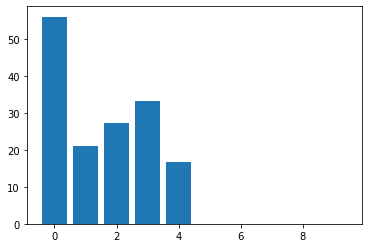

In [298]:

# define dataset
X=train.copy()
y=label.copy()
X, y = make_regression(n_samples=50000, n_features=10, n_informative=5, random_state=1)
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [299]:
train.columns

Index(['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private',
       'basin', 'region', 'district_code', 'lga', 'population', 'permit',
       'construction_year', 'extraction_type_group', 'management_group',
       'payment', 'water_quality', 'quantity_group', 'source', 'source_class',
       'waterpoint_type_group'],
      dtype='object')